In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
# import sys
# !{sys.executable} -m pip install yfinance
import yfinance as yf
import pandas as pd

In [2]:
stock_symbol = "AAPL"
start_date = "2023-08-01"
end_date = "2023-09-01"

# Load the stock price data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)
print(data.shape)

[*********************100%%**********************]  1 of 1 completed
(23, 6)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2023-08-01 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       23 non-null     float64
 1   High       23 non-null     float64
 2   Low        23 non-null     float64
 3   Close      23 non-null     float64
 4   Adj Close  23 non-null     float64
 5   Volume     23 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.3 KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01
mean,181.415219,182.771738,179.676088,181.083913,180.997362,5.749737e+07
std,6.144299,5.957681,6.158786,5.957948,5.902876,1.778665e+07
min,172.300003,175.100006,171.960007,174.000000,174.000000,3.517510e+07
25%,177.350006,178.884995,176.375000,177.339996,177.339996,4.663840e+07
50%,179.690002,180.750000,177.350006,178.850006,178.610001,5.300390e+07
75%,183.535004,186.139999,180.709999,183.055000,182.932289,6.096405e+07
max,196.240005,196.729996,195.279999,195.610001,195.346207,1.157997e+08


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.346207,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.320297,50389300
2023-08-03,191.570007,192.369995,190.690002,191.169998,190.912201,61235200
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.744583,115799700
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100


In [6]:
data.reset_index(inplace=True)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-01,196.240005,196.729996,195.279999,195.610001,195.346207,35175100
1,2023-08-02,195.039993,195.179993,191.850006,192.580002,192.320297,50389300
2,2023-08-03,191.570007,192.369995,190.690002,191.169998,190.912201,61235200
3,2023-08-04,185.520004,187.380005,181.919998,181.990005,181.744583,115799700
4,2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100


### Change Date column to datetime format

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
 6   Volume     756 non-null    int64         
 7   Days       756 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 53.2 KB


In [23]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Days
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943253,148158800,0
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163822,365248800,1
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622257,234428400,2
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542980,219111200,5
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220531,164101200,6


In [24]:
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [41]:
data.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume,Days
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943253,148158800,0
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163822,365248800,1
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622257,234428400,2
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542980,219111200,5
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220531,164101200,6
5,2019-01-09,37.822498,38.632500,37.407501,38.327499,36.835617,180396400,7
6,2019-01-10,38.125000,38.492500,37.715000,38.450001,36.953346,143122800,8
7,2019-01-11,38.220001,38.424999,37.877499,38.072498,36.590542,108092800,9
8,2019-01-14,37.712502,37.817501,37.305000,37.500000,36.040325,129756800,12
9,2019-01-15,37.567501,38.347500,37.512501,38.267502,36.777954,114843600,13


In [26]:
data['Date'].min()

Timestamp('2019-01-02 00:00:00')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Split the data into features (X) and target variable (y)
X = data[['Days']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pytz
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
y_pred

array([101.22452132,  46.27081858, 104.27750481, 132.60919155,
       135.90641371,  42.97359642,  38.69941954,  48.59108603,
        86.44808125, 117.22215478,  36.13491341,  92.43192888,
        92.1876902 , 125.6483892 , 113.5585746 ,  88.157752  ,
        76.31217608, 108.67380102, 109.77287508, 123.93871845,
       153.98007595, 149.46166039,  82.17390437, 111.11618781,
       114.04705196, 105.4986982 , 107.57472697,  86.57020059,
       155.56762736,  59.9481846 ,  79.85363692,  67.51958364,
        56.5288431 ,  50.42287612,  83.27297843,  84.7384105 ,
       105.01022084, 160.94087829, 149.58377973, 156.78882075,
       118.80970619, 130.2889241 ,  40.89756765,  72.6485959 ,
       160.20816226, 105.86505622, 156.66670141,  64.22236148,
        69.10713505, 162.28419103,  35.1579587 ,  90.47801945,
        42.85147708, 145.30960285,  61.04725865, 113.19221658,
        66.05415157, 114.90188733,  81.07483032,  30.88378182,
        75.09098269,  43.58419312,  34.547362  , 132.36

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error: 8.952013442376808


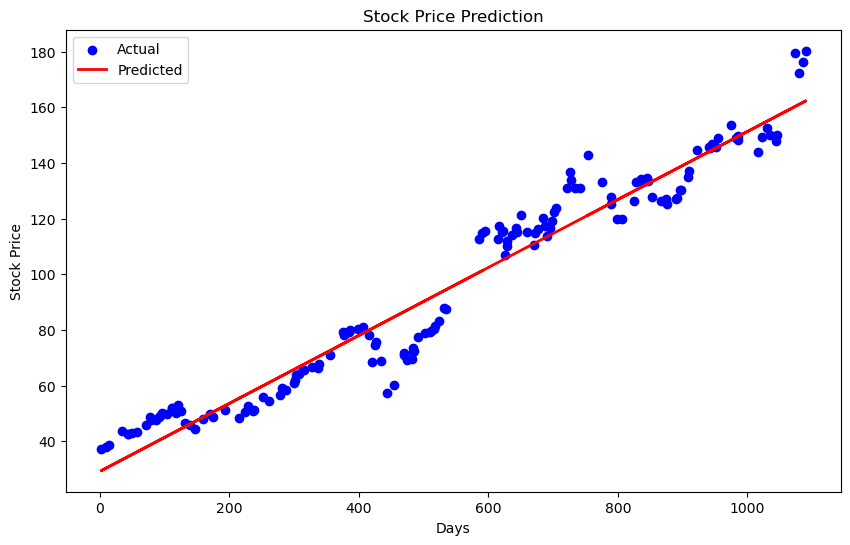

In [32]:
# Visualize the predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [33]:
# Make a prediction for the next day's stock price
last_day = data['Days'].max()


In [35]:
next_day = last_day + 1


In [37]:
next_price = model.predict([[next_day]])
print("Predicted Stock Price for Next Day:", next_price)

Predicted Stock Price for Next Day: [162.77266838]


C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


####

In [39]:
score = model.score(X_test, y_test)


In [40]:
score

0.9460001318976797

[*********************100%%**********************]  1 of 1 completed
604/604 [==============================] - 2s 1ms/step - loss: 0.0032


(152, 1)